<a href="https://colab.research.google.com/github/amemov/Neural-Network-Intro-to-AI/blob/main/ai_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Final Project for Intro to AI class by Anton Shepelev and Andrey Kukushkin
# Deep Neural Network with linear regression model. 
"""
      Predicts
Y1  Heating Load
      Features
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution"""
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras

np.set_printoptions(precision=3, suppress=True) # Make numpy values easier to read

###############################################################################
def plot_loss(history): 
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Heating Load]')
  plt.legend()
  plt.grid(True)
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)

  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
###############################################################################

# Intitialize dataset. Remove Y2 column from dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
column_names = ['X1','X2','X3','X4','X5','X6','X7','X8','Y1','Y2'] 
energy_eff_data = pd.read_excel(url,names=column_names)
energy_eff_data.pop('Y2')
energy_eff_data.tail()

# Data Fragmentation into train and test sets
train_dataset = energy_eff_data.sample(frac=0.8, random_state=0)
test_dataset = energy_eff_data.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Y1')
test_labels = test_features.pop('Y1')

# Normalization of features
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 170
Trainable params: 153
Non-trainable params: 17
_________________________________________________________________
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


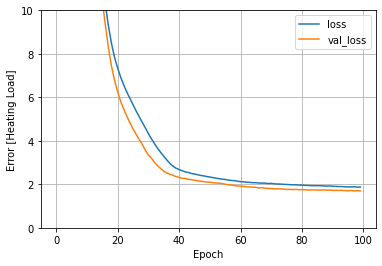

In [2]:
# Neural Network Model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()
%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_predictions = dnn_model.predict(test_features).flatten()

--------------------------------
Model Accuracy:  92.84616613388062
--------------------------------


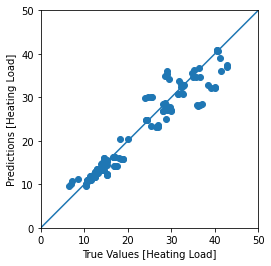

In [3]:
# Plot the model
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Heating Load]')
plt.ylabel('Predictions [Heating Load]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Print accuracy of the model
print("-"*32)
temp = pd.DataFrame(data=test_labels)
temp = temp['Y1'].tolist()
#test_predictions = test_predictions.tolist()
print("Model Accuracy: ",  (100 - tf.metrics.mean_squared_error(temp,test_predictions).numpy()))   
print("-"*32)